# Fundos de Investimento Imobiliário

Os fundos imobiliários são fundos de investimento que reúnem a aplicação de diversos investidores com o objetivo de investir em empreendimentos imobiliários, que incluem aquisições de direitos reais sobre bens de imóveis, investimento em títulos e valores mobiliários relacionados mercado imobiliário.

A carteira apresentada foi montada com os 10 fundos de investimentos imobiliários mais rentáveis de Outubro de 2023, de acordo com o Estadão:

HCTR11.SA - Hectare CE \
HTMX11.SA - Hotel Maxinvest \
VSLH11.SA - Versalhes Recebíveis Imobiliários \
DEVA11.SA - Devant Recebíveis Imobiliários \
JSAF11.SA - JS Ativos Financeiros \
KNCR11.SA - Kinea Rendimentos Imobiliários
RZTR11.SA - Riza Terrax \
AFHI11.SA - AF Invest CRI \
RBRY11.SA - RBR Private Crédito Imobiliário \
XPCI11.SA - XP Crédito Imobiliário 

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


tickers = ['HCTR11.SA', 'HTMX11.SA', 'VSLH11.SA', 'DEVA11.SA', 'JSAF11.SA', 'KNCR11.SA', 'RZTR11.SA', 'AFHI11.SA', 'RBRY11.SA', 'XPCI11.SA']

# Puxar os dados do Yahoo Finance
data = yf.download(tickers, start='2022-01-01', end='2023-12-01')['Adj Close']

# Imprimir os primeiros 5 registros para cada ticker
print(data.head())


[*********************100%***********************]  10 of 10 completed
            AFHI11.SA  DEVA11.SA   HCTR11.SA  HTMX11.SA  JSAF11.SA  KNCR11.SA  \
Date                                                                            
2022-01-03  91.324089  96.610191  103.500656  78.970200  93.534431  81.841446   
2022-01-04  92.083328  96.813393  103.833389  77.748466  92.266914  81.098869   
2022-01-05  91.666679  96.000603  102.494286  77.890114  90.449547  80.883263   
2022-01-06  91.203712  94.411980  102.964989  79.687309  90.020821  80.771500   
2022-01-07  92.592598  95.113945  103.070511  77.527138  91.055328  80.683678   

            RBRY11.SA  RZTR11.SA  VSLH11.SA  XPCI11.SA  
Date                                                    
2022-01-03  82.137512  93.787811   9.281102  77.707329  
2022-01-04  81.036049  94.261398   9.281102  78.191002  
2022-01-05  81.397957  94.270668   9.252690  78.344147  
2022-01-06  81.972298  94.066391   9.252690  77.812157  
2022-01-07  82.5308

In [3]:
# # Retorno Histórico dos Ativos
# retornos_carteira = data.pct_change()

# # Ordernar os tickers dos que possuem maior retorno para os que possuem menor retorno
# retornos_carteira = retornos_carteira.sort_values(ascending=False, by=retornos_carteira.columns[0])

# # Gráfico de Retorno Histórico
# for ticker in tickers[:]:
#     plt.figure(figsize=(15, 6))
#     sns.lineplot(data=retornos_carteira[ticker], label=ticker, linewidth=2)
#     plt.title(f'Retorno Histórico - {ticker}')
#     plt.xlabel('Data')
#     plt.ylabel('Retorno')
#     plt.show()

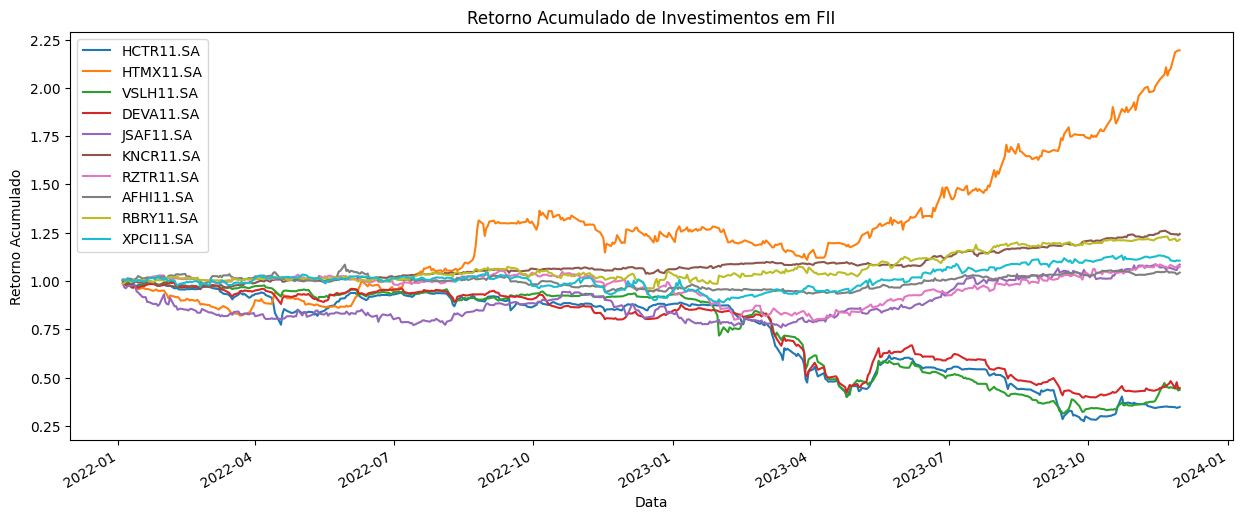

In [5]:
# Agrupar os retornos em um único DataFrame
df = pd.DataFrame()
for ticker in tickers[:]:
    df[ticker] = data[ticker].pct_change()
df.dropna(inplace=True)

# Retorno Acumulado Mensal 
df_cum = (1 + df).cumprod()
df_cum.plot(figsize=(15, 6))
plt.title('Retorno Acumulado de Investimentos em FII')
plt.xlabel('Data')
plt.ylabel('Retorno Acumulado')
plt.show()

## Escolha dos 5 melhores FIIs

### Clusterização 

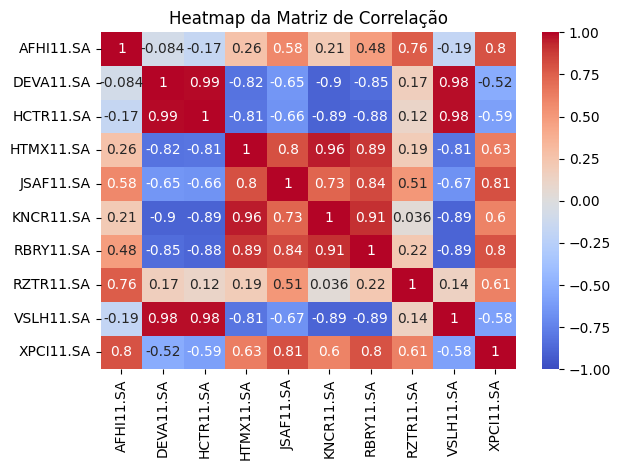

In [6]:
# Correlação
data_corr = data.corr()

sns.heatmap(data_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap da Matriz de Correlação')
plt.tight_layout()
plt.show()

c:\Users\tatia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\tatia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\tatia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\tatia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

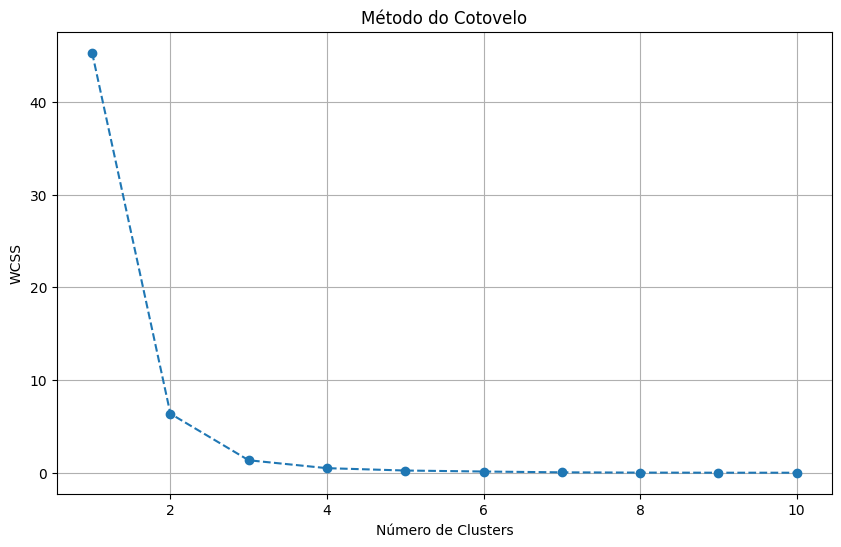

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# WCSS para diferentes números de clusters
wcss = [] # Armazenar uma lista para alocar as distâncias
for i in range(1, 11): 
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_corr) 
    wcss.append(kmeans.inertia_) # Resultados do inertia 

# Plotar WCSS em relação ao número de clusters
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.grid(True)

plt.show()

In [10]:
# Definir o número de clusters
num_clusters = 4

# Rodar o KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=num_clusters)   # para o número de clusters definido
nomes = kmeans.fit_predict(data_corr)  # Alocar os tickers pela correlação

matriz_correl_clustered = data_corr.copy() # Cópia da matriz de correlação
matriz_correl_clustered['Cluster'] = nomes # Adicionar nomes como uma nova coluna
matriz_correl_clustered = matriz_correl_clustered.sort_values('Cluster') # Ordenar as linhas com base nos clusters

df_clusters = pd.DataFrame({
    'Ticker': data_corr.index,
    'Cluster': nomes })

# Ordenar os tickers por cluster
df_clusters = df_clusters.sort_values(by='Cluster')
print(df_clusters)

      Ticker  Cluster
3  HTMX11.SA        0
5  KNCR11.SA        0
6  RBRY11.SA        0
1  DEVA11.SA        1
2  HCTR11.SA        1
8  VSLH11.SA        1
0  AFHI11.SA        2
7  RZTR11.SA        2
4  JSAF11.SA        3
9  XPCI11.SA        3


c:\Users\tatia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [11]:
# Calcular os retornos diários e remover os NAs
retorno = data.pct_change().dropna() 
retorno_acumulado = (1 + retorno).cumprod()  # Adicionar 1 para representar o retorno percentual efetivo e cumprod para o cálculo cumulativo

# Guardar apenas o último valor do retorno acumulado
final_retorno_acumulado = retorno_acumulado.iloc[-1]

# Juntar os tickers com o retorno acumulado
df_combinado = pd.concat([df_clusters.set_index('Ticker'), final_retorno_acumulado], axis=1)
df_combinado.columns = ['Cluster', 'Retorno Acumulado']

# Criar uma lista com todos os rótulos únicos de clusters
unique_clusters = df_clusters['Cluster'].unique()

# Selecionar os tickers com maior retorno em cada cluster
tickers_selecionados_clusters = []
for cluster in unique_clusters:
    # Selecionar os dois melhores
    tickers_cluster = df_combinado[df_combinado['Cluster'] == cluster].nlargest(1, 'Retorno Acumulado').index
    tickers_selecionados_clusters.extend(tickers_cluster)

print("Tickers com maior retorno acumulado de cada cluster:")
for ticker in tickers_selecionados_clusters:
    print(ticker)


Tickers com maior retorno acumulado de cada cluster:
HTMX11.SA
DEVA11.SA
RZTR11.SA
XPCI11.SA


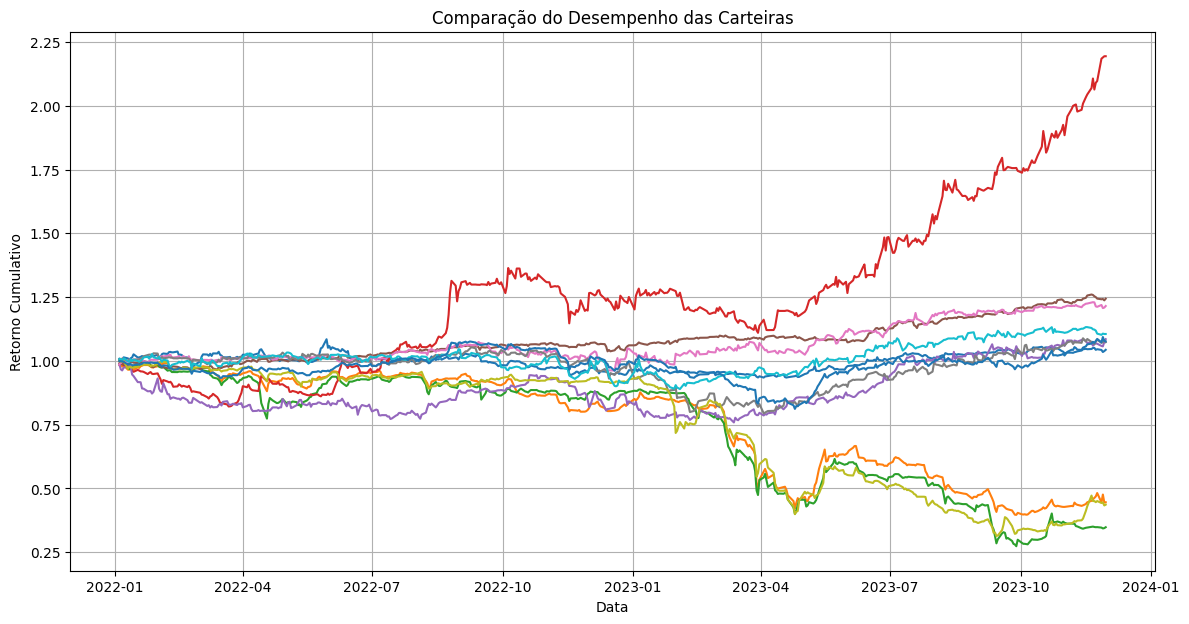

In [15]:
# Calcular o retoro dos tickers selecionados

dados_selecionados = data[tickers_selecionados_clusters]
weights = [1/len(tickers_selecionados_clusters)] * len(tickers_selecionados_clusters) # peso na carteira
portfolio_selecionado = dados_selecionados.pct_change().dropna().dot(weights) 
retorno_acumulado_selecionado = (1 + portfolio_selecionado).cumprod()

# visualização
plt.figure(figsize=(14, 7))
# 
plt.plot(retorno_acumulado, label="Carteira Todos os Tickers")
plt.plot(retorno_acumulado_selecionado, label="Carteira Diferenciada")
plt.title('Comparação do Desempenho das Carteiras')
plt.ylabel('Retorno Cumulativo')
plt.xlabel('Data')
plt.grid(True)
plt.show()

### Média dos Retornos

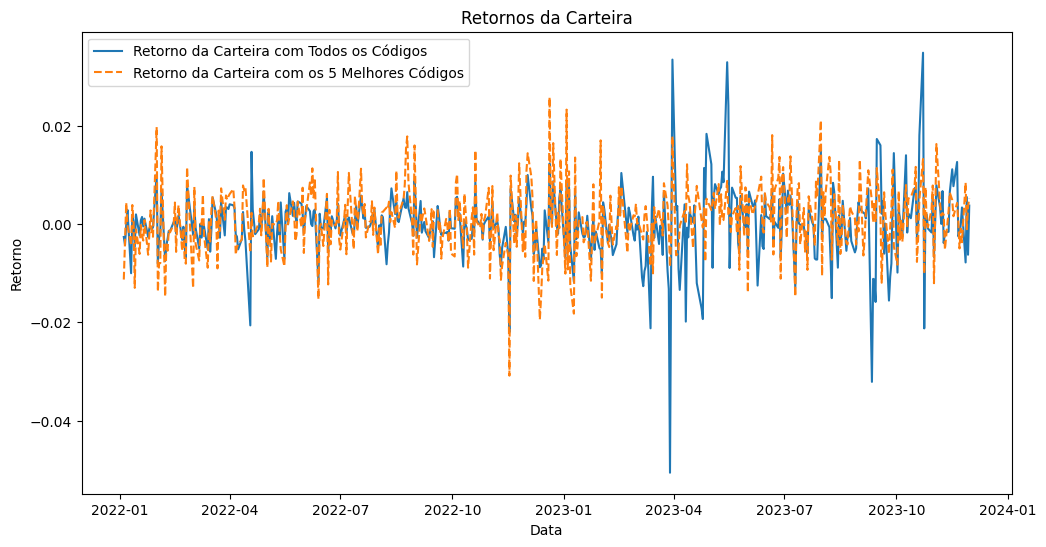

In [18]:

# Calcular o retorno médio
media_retornos = retorno.mean(axis=0)
media_retornos_top = media_retornos.nlargest(5).index.tolist()  

retorno_carteira = (retorno[tickers] * 0.1).sum(axis=1) 

# Gráfico de Retornos da Carteira
plt.figure(figsize=(12, 6))
plt.plot(retorno_carteira.index, retorno_carteira, label='Retorno da Carteira com Todos os Códigos')
plt.plot(retorno_carteira.index, (retorno[media_retornos_top] * 0.25).sum(axis=1), label='Retorno da Carteira com os 5 Melhores Códigos', linestyle='--')
plt.legend()
plt.title('Retornos da Carteira')
plt.xlabel('Data')
plt.ylabel('Retorno')
plt.show()

In [17]:
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier()
modelo.fit(retorno[media_retornos_top], retorno.index)

ultima_data = retorno.index[-1] # referência ao último item retornos
decisao_alocacao = modelo.predict([retorno[media_retornos_top].iloc[-1]])[0] 
decisao_alocacao = max(0, min(int(decisao_alocacao), len(media_retornos_top) - 1)) # garante que o valor 
# escolher as empresas com base na decisão
empresas_selecionadas = [media_retornos_top[i] for i in range(decisao_alocacao + 1)]

print(f"Alocação escolhida pela árvore de decisão na data mais recente ({ultima_data}): \n {empresas_selecionadas}")

pesos_alocacao = {empresa: 0.25 for empresa in empresas_selecionadas}
retornos_carteira = (retorno[empresas_selecionadas] * np.array(list(pesos_alocacao.values()))).sum(axis=1)

retornos_todas_empresas = retorno[tickers].mean(axis=1)

# Gráfico
grafico = px.line()
grafico.add_scatter(x=retornos_carteira.index, y=retornos_carteira, mode='lines', name='Retorno da Carteira com as 4 Melhores Empresas')
grafico.add_scatter(x=retornos_todas_empresas.index, y=retornos_todas_empresas, mode='lines', name='Retorno Médio de Todas as Empresas', line=dict(dash='dash'))
grafico.update_layout(title='Retornos da Carteira', xaxis_title='Data', yaxis_title='Retorno', legend=dict(x=0, y=-0.2))
grafico.show()

c:\Users\tatia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Alocação escolhida pela árvore de decisão na data mais recente (2023-11-30 00:00:00): 
 ['HTMX11.SA', 'KNCR11.SA', 'RBRY11.SA', 'XPCI11.SA', 'JSAF11.SA']


## Pesos e Retornos das Carteiras

In [20]:
# Carteira de FII's com os maiores retornos médios

data = yf.download(media_retornos_top, start='2022-12-01', end='2023-12-01')['Adj Close']

import yfinance as yf
import pandas as pd
import numpy as np
from scipy.optimize import dual_annealing

returns = data.pct_change().dropna()

# criar função de penalidade para retornos abaixo de 12% # Peso para cada tickers, retorno, taxa de retorno exigida 
def penalty_for_low_returns(weights, returns, target_return=0.12):
    #  retorno anualizado do portfólio
    portfolio_return = np.sum(returns.mean() * weights) * 252 # 252 dias úteis em um ano - retorno anualizado
    # se o retorno for menor que o retorno alvo, retorne um valor alto (penalidade)
    if portfolio_return < target_return:
        return 1e10  # penalidade alta para retornos abaixo do alvo
    else:
        # se o retorno alvo for atingido, minimizar a volatilidade (pela covariância)
        portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
        return portfolio_volatility  # minimizar a volatilidade do portfólio

# restrições e limites
bounds = [(0.0, 1.0) for _ in range(len(media_retornos_top))]

# otimização de Annealing Simulado
result = dual_annealing(penalty_for_low_returns, bounds=bounds, args=(returns,))

# melhores pesos encontrados para o portfólio
optimal_weights = result.x
optimal_return = np.sum(returns.mean() * optimal_weights) * 252
# Normalizar os pesos
normalized_weights = optimal_weights / np.sum(optimal_weights)

# resultados
print("Pesos ótimos do portfólio:")
print(normalized_weights)
print("Retorno esperado do portfólio:")
print(optimal_return)

if optimal_return < 0.12:
    print("O retorno alvo de 12% não foi atingido.")
else:
    print("O retorno alvo de 12% foi atingido ou superado.")

# Imprime o ticker e o peso para cada ativo
for ticker, peso in zip(tickers, normalized_weights):
    print(f"{ticker}: {peso:.2f}")
    

[*********************100%***********************]  5 of 5 completed
Pesos ótimos do portfólio:
[0.14580056 0.14138784 0.56466367 0.03557051 0.11257742]
Retorno esperado do portfólio:
0.1200219149464355
O retorno alvo de 12% foi atingido ou superado.
HCTR11.SA: 0.15
HTMX11.SA: 0.14
VSLH11.SA: 0.56
DEVA11.SA: 0.04
JSAF11.SA: 0.11


In [21]:
print(media_retornos_top)

['HTMX11.SA', 'KNCR11.SA', 'RBRY11.SA', 'XPCI11.SA', 'JSAF11.SA']


Referências

https://einvestidor.estadao.com.br/investimentos/fundos-imobiliarios-mais-rentaveis-outubro-2023/

https://www.gov.br/investidor/pt-br/investir/tipos-de-investimentos/fundos-de-investimentos-imobiliarios-fii